## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

## Importing the dataset

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/sreekeshiyer/dmbi_aids_datasets/main/Mall_Customers.csv')

In [3]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Preprocessing and EDA

In [4]:
dataset.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

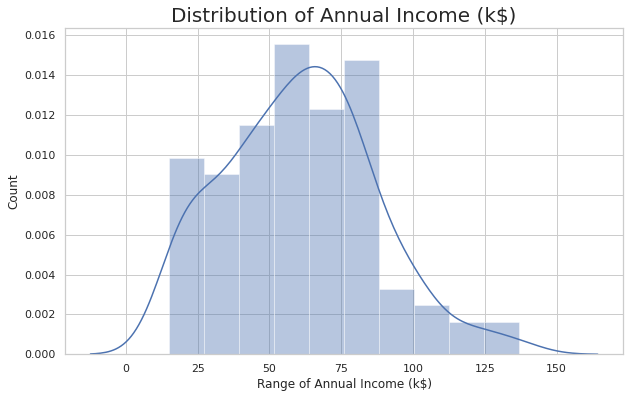

In [5]:
#Distribution of Annnual Income
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(dataset['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

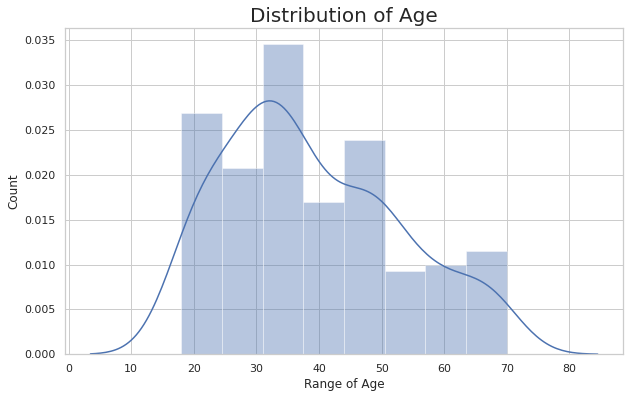

In [6]:
#Distribution of age
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(dataset['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

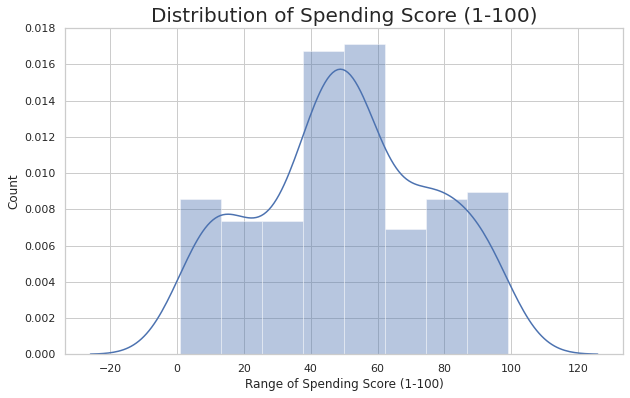

In [7]:
#Distribution of spending score
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(dataset['Spending Score (1-100)'])
plt.title('Distribution of Spending Score (1-100)', fontsize = 20)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')

In [8]:
dataset.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [9]:
#We take just the Age, Annual Income and Spending score
X=dataset[["Age","Annual Income (k$)","Spending Score (1-100)"]]

## Using the elbow method to find the optimal number of clusters

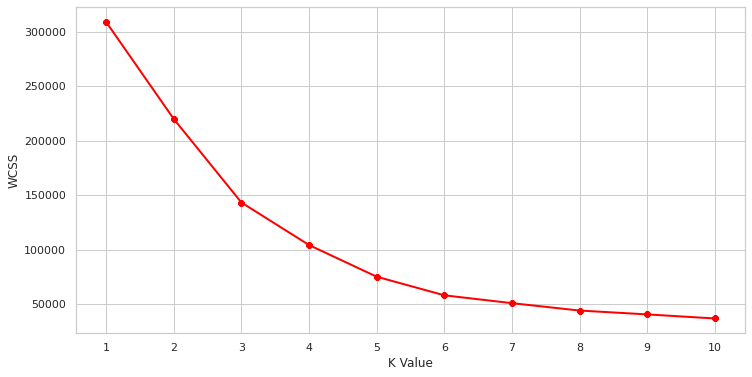

In [10]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

## Training the K-Means model on the dataset

In [11]:
kmeans = KMeans(n_clusters = 5, random_state = 1)
#predicting the labels of the input data
y_kmeans = kmeans.fit_predict(X)
#adding the labels to a column named label
dataset["label"] = y_kmeans
#The new dataframe with the clustering done
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,3
1,2,Male,21,15,81,1
2,3,Female,20,16,6,3
3,4,Female,23,16,77,1
4,5,Female,31,17,40,3


## Visualising the clusters

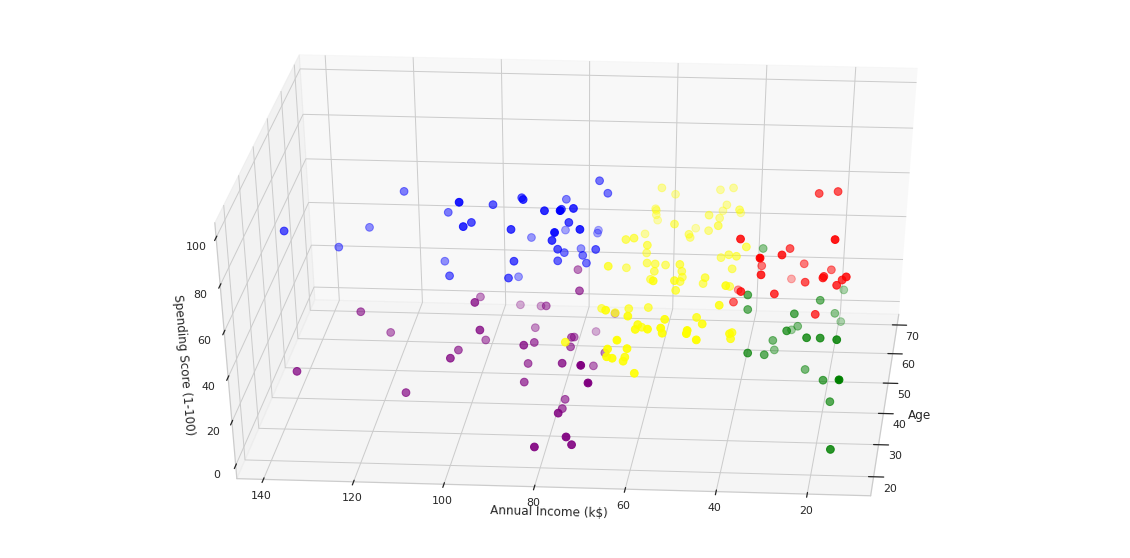

In [12]:
#3D Plot as we did the clustering on the basis of 3 input features
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset.Age[dataset.label == 0], dataset["Annual Income (k$)"][dataset.label == 0], dataset["Spending Score (1-100)"][dataset.label == 0], c='purple', s=60)
ax.scatter(dataset.Age[dataset.label == 1], dataset["Annual Income (k$)"][dataset.label == 1], dataset["Spending Score (1-100)"][dataset.label == 1], c='red', s=60)
ax.scatter(dataset.Age[dataset.label == 2], dataset["Annual Income (k$)"][dataset.label == 2], dataset["Spending Score (1-100)"][dataset.label == 2], c='blue', s=60)
ax.scatter(dataset.Age[dataset.label == 3], dataset["Annual Income (k$)"][dataset.label == 3], dataset["Spending Score (1-100)"][dataset.label == 3], c='green', s=60)
ax.scatter(dataset.Age[dataset.label == 4], dataset["Annual Income (k$)"][dataset.label == 4], dataset["Spending Score (1-100)"][dataset.label == 4], c='yellow', s=60)
ax.view_init(35, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

## Metrics

In [13]:
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(X, y_kmeans)
print(db_index)

0.8218781633199779
